In [1]:
import requests
import time
import MeCab
import re
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
def get_wikipedia_text(title):
    """Wikipediaからテキストを取得（エラーハンドリング付き）"""
    url = "https://ja.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "prop": "extracts",
        "titles": title,
        "format": "json",
        "explaintext": ""
    }
    
    try:
        response = requests.get(url, params=params, timeout=10)
        response.raise_for_status()  # HTTPエラーをチェック

        # JSONデコードエラーをチェック
        try:
            data = response.json()
        except requests.exceptions.JSONDecodeError:
            print(f"'{title}' のレスポンスがJSON形式ではありません")
            return None
        
        pages = data['query']['pages']
        for page_id in pages:
            page = pages[page_id]
            if 'extract' in page:
                return page['extract']
            else:
                print(f"ページ '{title}' の内容を取得できませんでした")
                return None
                
    except requests.RequestException as e:
        print(f"'{title}' の取得でエラー: {e}")
        return None
    except Exception as e:
        print(f"'{title}' で予期しないエラー: {e}")
        return None

In [3]:
def get_wikipedia_text(title):
    """Wikipediaからテキストを取得（エラーハンドリング付き）"""
    url = "https://ja.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "prop": "extracts",
        "titles": title,
        "format": "json",
        "explaintext": ""
    }
    
    try:
        response = requests.get(url, params=params, timeout=10)
        response.raise_for_status()  # HTTPエラーをチェック

        # JSONデコードエラーをチェック
        try:
            data = response.json()
        except requests.exceptions.JSONDecodeError:
            print(f"'{title}' のレスポンスがJSON形式ではありません")
            return None
        
        pages = data['query']['pages']
        for page_id in pages:
            page = pages[page_id]
            if 'extract' in page:
                return page['extract']
            else:
                print(f"ページ '{title}' の内容を取得できませんでした")
                return None
                
    except requests.RequestException as e:
        print(f"'{title}' の取得でエラー: {e}")
        return None
    except Exception as e:
        print(f"'{title}' で予期しないエラー: {e}")
        return None

In [ ]:
# 存在するページのみを使用
japan_articles = [
    "日本", "日本の政治", "日本の経済", "日本の地理",
    "日本の歴史", "日本の文化", "日本の社会", "日本の教育"
]

all_japan_texts = []
for article in japan_articles:
    print(f"==={article}を取得中===")
    text = get_wikipedia_text(article)
    if text:
        all_japan_texts.append(text)
        print(f"成功!{len(text)}文字")
    else:
        print(f"失敗")
    print("-" * 30)

    # API制限を避けるため3秒待機
    time.sleep(20)

===日本を取得中===
成功!29031文字
------------------------------
===日本の政治を取得中===
成功!8759文字
------------------------------


In [ ]:
tagger = MeCab.Tagger()
tagger.parse('')

def tokenize_with_mecab(text):
    """Mecabを使用してテキストをトークン化"""
    text_words = tagger.parseToNode(text)
    text_words = text_words.next
    wakati_text = []
    while text_words:
        surface = text_words.surface
        feature = text_words.feature.split(",")
        if feature[0] == '名詞':
             if re.fullmatch(r'[ぁ-んァ-ヴー一-龯]+', surface):
               wakati_text.append(surface)
             else:
                pass
        text_words = text_words.next
    return wakati_text

=== 単語頻度ランキング（上位20位）===
1位：日本: 941
2位：年: 690
3位：的: 301
4位：時代: 263
5位：こと: 242
6位：文化: 223
7位：世界: 206
8位：化: 204
9位：国: 173
10位：人: 168
11位：経済: 147
12位：者: 147
13位：市: 146
14位：教育: 144
15位：日: 135
16位：県: 133
17位：内閣: 132
18位：ため: 128
19位：よう: 120
20位：世紀: 109

=== ジップの法則のグラフを表示中 ===


/var/folders/j0/gp82t6w11mscj80m09xjvs_h0000gn/T/ipykernel_27083/477961133.py:30: UserWarning: Glyph 38918 (\N{CJK UNIFIED IDEOGRAPH-9806}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j0/gp82t6w11mscj80m09xjvs_h0000gn/T/ipykernel_27083/477961133.py:30: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j0/gp82t6w11mscj80m09xjvs_h0000gn/T/ipykernel_27083/477961133.py:30: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j0/gp82t6w11mscj80m09xjvs_h0000gn/T/ipykernel_27083/477961133.py:30: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j0/gp82t6w11mscj80m09xjvs_h0000gn/T/ipykernel_27083/477961133.py:30: UserWarning: Glyph 12472 (\N{KATAKANA LETTER ZI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/j0/gp82t6w11mscj80m0

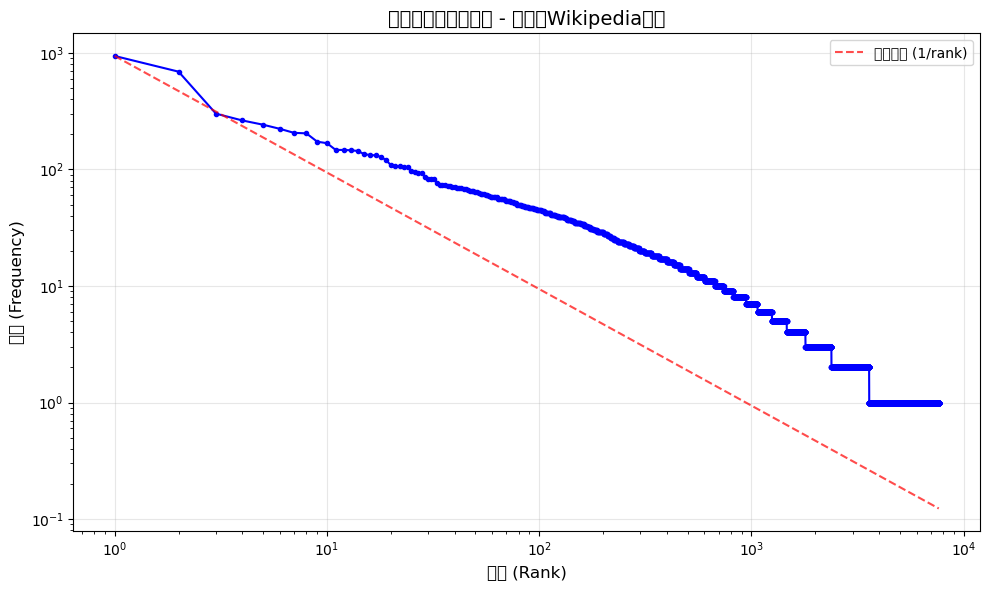

総単語数: 36005
ユニーク単語数: 7633


In [9]:
if all_japan_texts:
    combined_text = ' '.join(all_japan_texts)
    mecab_text = tokenize_with_mecab(combined_text)
    counter = Counter(mecab_text)
    
    # 上位20位まで表示
    print("=== 単語頻度ランキング（上位20位）===")
    for i, (word, count) in enumerate(counter.most_common(20)):
        print(f"{i + 1}位：{word}: {count}")
    
    # ジップの法則のグラフ化
    print("\n=== ジップの法則のグラフを表示中 ===")
    most_common = counter.most_common()
    ranks = list(range(1, len(most_common) + 1))  # 順位: 1, 2, 3...
    frequencies = [count for _, count in most_common]  # 頻度
    
    # 両対数グラフでプロット
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, 'bo-', markersize=3)
    plt.xlabel('順位 (Rank)', fontsize=12)
    plt.ylabel('頻度 (Frequency)', fontsize=12)
    plt.title('ジップの法則の検証 - 日本語Wikipedia記事', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    # 理論曲線も表示（比較用）
    theoretical = [frequencies[0] / r for r in ranks]
    plt.loglog(ranks, theoretical, 'r--', alpha=0.7, label='理論曲線 (1/rank)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"総単語数: {len(mecab_text)}")
    print(f"ユニーク単語数: {len(counter)}")
else:
    print("テキストを取得できませんでした")